# Chapter 10: Introduction to Artificial Neural Networks with Keras

## Perceprtron on iris Dataset

In [0]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width 
y = (iris.target == 0).astype(np.int) # Iris Setosa?

In [2]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [3]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regu‐ larization).

## Mnist using Keras

### Getting Data

In [4]:
from tensorflow import keras
import tensorflow as tf

In [5]:
mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_test.shape

(10000, 28, 28)

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

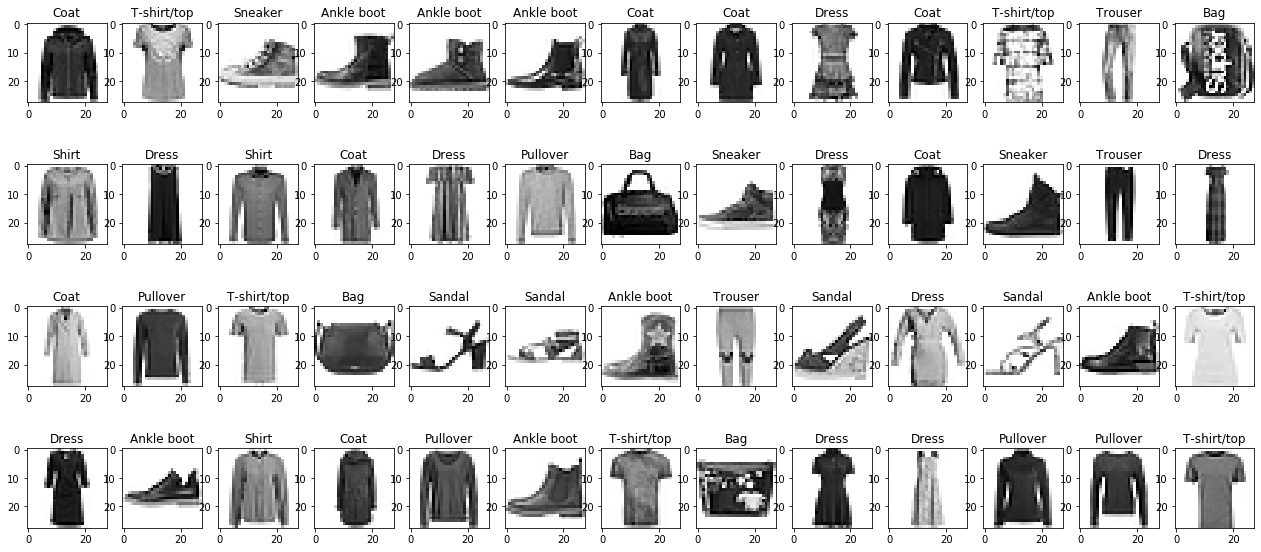

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 10))
for i in range(52):
  plt.subplot(4, 13, i+1)
  plt.imshow(X_train[i], cmap='binary')
  plt.title(class_names[y_train[i]])
plt.show()

### Creating Model

Add a model which connects layers sequentially. like an stack of layers.

In [0]:
model = keras.models.Sequential()

adding layers : 

In [11]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Summerize Model

The model’s summary() method displays all the model’s layers13, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parame‐ ters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

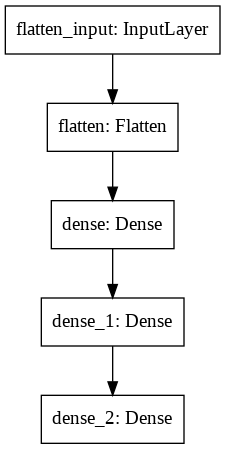

In [14]:
keras.utils.plot_model(model)

In [15]:
model.layers[0]

### Compling Model

In [0]:
model.compile(optimizer="sgd", loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

First, we use the "sparse_categorical_crossen tropy" loss because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive


since this is a classifier, it’s useful to measure its "accuracy" during training and evaluation.

### Training Model

In [17]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 95us/sample - loss: 0.7247 - acc: 0.7636 - val_loss: 0.5261 - val_acc: 0.8210
Epoch 2/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.4898 - acc: 0.8292 - val_loss: 0.4689 - val_acc: 0.8354
Epoch 3/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.4433 - acc: 0.8444 - val_loss: 0.4532 - val_acc: 0.8452
Epoch 4/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.4143 - acc: 0.8541 - val_loss: 0.4054 - val_acc: 0.8586
Epoch 5/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3946 - acc: 0.8614 - val_loss: 0.3754 - val_acc: 0.8698
Epoch 6/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3770 - acc: 0.8648 - val_loss: 0.3704 - val_acc: 0.8720
Epoch 7/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3638 - acc: 0.8709 - val_loss: 0.3

* It would be useful to set the class_weight argument when calling the fit() method, giving a larger weight to underrepresented classes, and a lower weight to overrepresented classes.

In [18]:
history

#### Ploting train's history

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(history.history)

In [21]:
df.head()

,loss,acc,val_loss,val_acc
0,0.724684,0.763618,0.526149,0.8210
1,0.489843,0.829164,0.468854,0.8354
2,0.443325,0.844436,0.453181,0.8452
3,0.414328,0.854109,0.405386,0.8586
4,0.394611,0.861436,0.375354,0.8698


(0, 1)

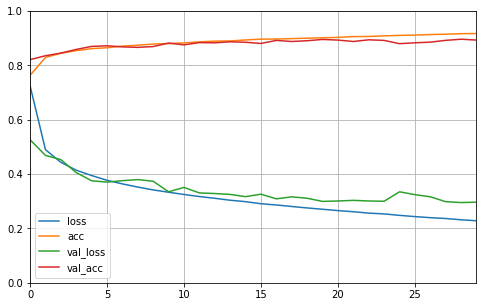

In [22]:
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

### Evaluate Model

In [23]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 42us/sample - loss: 56.2933 - acc: 0.8539


[56.29331138305664, 0.8539]

In [0]:
X_new = X_test[:3]

In [0]:
y_prob = model.predict(X_new)

In [26]:
y_prob

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

Compare our mdoel predictions

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
np.array(class_names)[y_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## House Price Using Keras

### Data prep.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [31]:
housing = fetch_california_housing()

In [0]:
class_names = housing.feature_names

In [0]:
X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)

In [0]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

##### Training a Model

In [0]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="sgd", loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])

In [38]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.8303 - mean_squared_error: 0.8303 - val_loss: 0.5546 - val_mean_squared_error: 0.5546
Epoch 2/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5579 - mean_squared_error: 0.5579 - val_loss: 0.9639 - val_mean_squared_error: 0.9639
Epoch 3/20
11610/11610 [==============================] - 1s 79us/sample - loss: 0.5850 - mean_squared_error: 0.5850 - val_loss: 0.5312 - val_mean_squared_error: 0.5312
Epoch 4/20
11610/11610 [==============================] - 1s 79us/sample - loss: 0.5112 - mean_squared_error: 0.5112 - val_loss: 0.4711 - val_mean_squared_error: 0.4711
Epoch 5/20
11610/11610 [==============================] - 1s 80us/sample - loss: 0.4756 - mean_squared_error: 0.4756 - val_loss: 0.4436 - val_mean_squared_error: 0.4436
Epoch 6/20
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4603 - mean_squared_err

In [39]:
mse_test = model.evaluate(X_test, y_test)
mse_test

5160/5160 [==============================] - 0s 42us/sample - loss: 0.3707 - mean_squared_error: 0.3707


[0.37071253079776617, 0.37071243]

In [0]:
X_new = X_test[:3] # pretend these are new instances 
y_pred = model.predict(X_new)

In [41]:
y_pred

array([[2.2123513],
       [1.7023041],
       [1.1635476]], dtype=float32)

In [42]:
y_test[:3]

array([2.033, 3.5  , 1.112])

## Building Complex Models Using the Functional API

This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transfor‐ mations.

### Build a Complex MLP for Housing

In [0]:
def build_concat_model(): 
  input_ = keras.layers.Input(shape=X_train.shape[1:])
  hidden1 = keras.layers.Dense(30, activation="relu")(input_)
  hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
  concat = keras.layers.concatenate([input_, hidden2])
  output = keras.layers.Dense(1)(concat)
  model = keras.models.Model(inputs=[input_], outputs=[output])
  return model

In [0]:
model = build_concat_model()

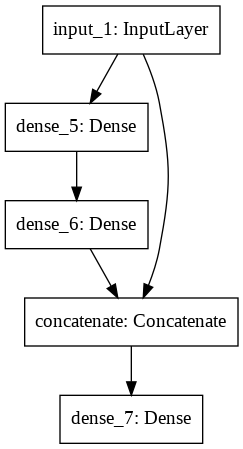

In [45]:
keras.utils.plot_model(model)

In [46]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 81us/sample - loss: 2.1955 - val_loss: 0.8828
Epoch 2/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.8483 - val_loss: 0.6790
Epoch 3/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.6819 - val_loss: 0.6298
Epoch 4/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.6373 - val_loss: 0.6031
Epoch 5/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.6119 - val_loss: 0.5801
Epoch 6/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5911 - val_loss: 0.5623
Epoch 7/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5738 - val_loss: 0.5477
Epoch 8/20
11610/11610 [==============================] - 1s 81us/sample - loss: 0.5605 - val_loss: 0.5377
Epoch 9/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5487 - val_l

In [47]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 34us/sample - loss: 0.4688


0.4687640034413153

In [48]:
X_new = X_test[:3] # pretend these are new instances 
y_pred = model.predict(X_new)
y_pred

array([[2.0750096],
       [1.7951401],
       [1.39468  ]], dtype=float32)

In [49]:
y_test[:3]

array([2.033, 3.5  , 1.112])

### Beuild a complex MLP with multiple inputs

In [0]:
input_a = keras.layers.Input(shape=[5])
input_b = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_b)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_a, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_a, input_b], outputs=[output])

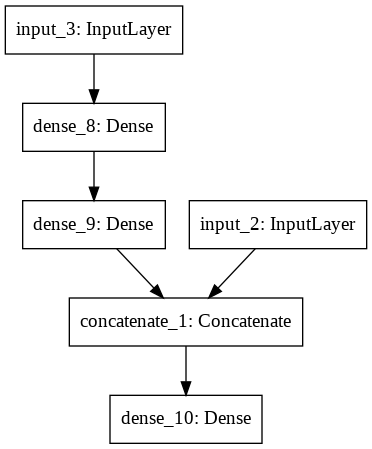

In [51]:
keras.utils.plot_model(model)

In [52]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] 
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:] 
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:] 
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.9145 - val_loss: 0.5593
Epoch 2/20
11610/11610 [==============================] - 1s 92us/sample - loss: 0.5341 - val_loss: 0.4998
Epoch 3/20
11610/11610 [==============================] - 1s 98us/sample - loss: 0.5285 - val_loss: 0.4920
Epoch 4/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.5046 - val_loss: 0.4523
Epoch 5/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4715 - val_loss: 0.4389
Epoch 6/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4561 - val_loss: 0.4255
Epoch 7/20
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4680 - val_loss: 0.4810
Epoch 8/20
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4416 - val_loss: 0.4089
Epoch 9/20
11610/11610 [==============================] - 1s 83us/sample - loss: 0.4272 - val_l

In [53]:
y_pred

array([[2.6594357],
       [1.7739341],
       [1.3534033]], dtype=float32)

In [54]:
y_test[:3]

array([2.033, 3.5  , 1.112])

### Build a complex MLP with multiple outputs

Why ?

* both a regression task and a classification task
* Similarly, you may have multiple independent tasks to perform based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks.
*  regularization technique :  to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

In [0]:
aux_output = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs=[input_a, input_b],
outputs=[output, aux_output])

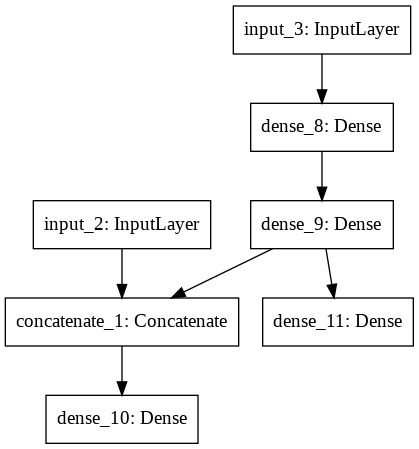

In [56]:
keras.utils.plot_model(model)

Each output will need its own loss function, so when we compile the model we should pass a list of losses (if we pass a single loss, Keras will assume that the same loss must be used for all outputs). By default, Keras will compute all these losses and simply add them up to get the final loss used for training. However, we care much more about the main output than about the auxiliary output (as it is just used for reg‐ ularization), so we want to give the main output’s loss a much greater weight

In [0]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [58]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 130us/sample - loss: 0.5028 - dense_10_loss: 0.3727 - dense_11_loss: 1.6722 - val_loss: 0.4212 - val_dense_10_loss: 0.3570 - val_dense_11_loss: 0.9989
Epoch 2/20
11610/11610 [==============================] - 1s 110us/sample - loss: 0.4256 - dense_10_loss: 0.3687 - dense_11_loss: 0.9393 - val_loss: 0.3969 - val_dense_10_loss: 0.3536 - val_dense_11_loss: 0.7874
Epoch 3/20
11610/11610 [==============================] - 1s 100us/sample - loss: 0.4102 - dense_10_loss: 0.3715 - dense_11_loss: 0.7607 - val_loss: 0.3825 - val_dense_10_loss: 0.3502 - val_dense_11_loss: 0.6724
Epoch 4/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.3930 - dense_10_loss: 0.3638 - dense_11_loss: 0.6563 - val_loss: 0.3828 - val_dense_10_loss: 0.3578 - val_dense_11_loss: 0.6072
Epoch 5/20
11610/11610 [==============================] - 1s 118us/sample - loss: 0.3807 - dense_10_los

In [59]:
total_loss, main_loss, aux_loss = model.evaluate( [X_test_A, X_test_B], [y_test, y_test])


5160/5160 [==============================] - 0s 56us/sample - loss: 0.3368 - dense_10_loss: 0.3247 - dense_11_loss: 0.4359


In [0]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [61]:
y_pred_main

array([[2.6592278],
       [1.6678085],
       [1.3223448]], dtype=float32)

In [62]:
y_pred_aux

array([[2.4080396],
       [1.725224 ],
       [1.2380903]], dtype=float32)

In [63]:
y_test[:3]

array([2.033, 3.5  , 1.112])

## Saving and Restoring Models


In [0]:
model.save("my_keras_model.h5")

In [65]:
model = keras.models.load_model('my_keras_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Using Callbacks

In [0]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

#### ModelCheckpoint Callback
the Mod elCheckpoint callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch

In [67]:
check_point_callback = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs=5, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[check_point_callback])

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 2s 144us/sample - loss: 0.3440 - dense_10_loss: 0.3330 - dense_11_loss: 0.4414 - val_loss: 0.3332 - val_dense_10_loss: 0.3210 - val_dense_11_loss: 0.4424
Epoch 2/5
11610/11610 [==============================] - 1s 110us/sample - loss: 0.3439 - dense_10_loss: 0.3333 - dense_11_loss: 0.4386 - val_loss: 0.3381 - val_dense_10_loss: 0.3266 - val_dense_11_loss: 0.4421
Epoch 3/5
11610/11610 [==============================] - 1s 109us/sample - loss: 0.3479 - dense_10_loss: 0.3381 - dense_11_loss: 0.4370 - val_loss: 0.3681 - val_dense_10_loss: 0.3582 - val_dense_11_loss: 0.4570
Epoch 4/5
11610/11610 [==============================] - 1s 117us/sample - loss: 0.3407 - dense_10_loss: 0.3304 - dense_11_loss: 0.4330 - val_loss: 0.3322 - val_dense_10_loss: 0.3213 - val_dense_11_loss: 0.4333
Epoch 5/5
11610/11610 [==============================] - 1s 126us/sample - loss: 0.3413 - dense_10_loss: 0.

Moreover, if you use a validation set during training, you can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set


In [68]:
check_point_callback = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                       save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs=5, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[check_point_callback])

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 112us/sample - loss: 0.3395 - dense_10_loss: 0.3297 - dense_11_loss: 0.4274 - val_loss: 0.3319 - val_dense_10_loss: 0.3212 - val_dense_11_loss: 0.4290
Epoch 2/5
11610/11610 [==============================] - 1s 102us/sample - loss: 0.3387 - dense_10_loss: 0.3291 - dense_11_loss: 0.4240 - val_loss: 0.3252 - val_dense_10_loss: 0.3146 - val_dense_11_loss: 0.4206
Epoch 3/5
11610/11610 [==============================] - 1s 116us/sample - loss: 0.3387 - dense_10_loss: 0.3295 - dense_11_loss: 0.4224 - val_loss: 0.3364 - val_dense_10_loss: 0.3262 - val_dense_11_loss: 0.4290
Epoch 4/5
11610/11610 [==============================] - 1s 103us/sample - loss: 0.3395 - dense_10_loss: 0.3302 - dense_11_loss: 0.4221 - val_loss: 0.3474 - val_dense_10_loss: 0.3375 - val_dense_11_loss: 0.4369
Epoch 5/5
11610/11610 [==============================] - 1s 121us/sample - loss: 0.3368 - dense_10_loss: 0.

In [0]:
model = keras.models.load_model("my_keras_model.h5") # rollback to best model

#### EarlyStopping Callbacks

Another way to implement early stopping is to simply use the EarlyStopping call‐ back. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model. You can combine both callbacks to both save checkpoints of your model (in case your computer crashes), and actually interrupt training early when there is no more progress (to avoid wasting time and resources)

In [70]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[check_point_callback, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 149us/sample - loss: 0.3376 - dense_10_loss: 0.3284 - dense_11_loss: 0.4213 - val_loss: 0.3346 - val_dense_10_loss: 0.3241 - val_dense_11_loss: 0.4283
Epoch 2/20
11610/11610 [==============================] - 1s 117us/sample - loss: 0.3368 - dense_10_loss: 0.3277 - dense_11_loss: 0.4189 - val_loss: 0.3284 - val_dense_10_loss: 0.3180 - val_dense_11_loss: 0.4213
Epoch 3/20
11610/11610 [==============================] - 1s 106us/sample - loss: 0.3370 - dense_10_loss: 0.3279 - dense_11_loss: 0.4180 - val_loss: 0.3431 - val_dense_10_loss: 0.3331 - val_dense_11_loss: 0.4339
Epoch 4/20
11610/11610 [==============================] - 1s 113us/sample - loss: 0.3346 - dense_10_loss: 0.3259 - dense_11_loss: 0.4150 - val_loss: 0.3301 - val_dense_10_loss: 0.3202 - val_dense_11_loss: 0.4205
Epoch 5/20
11610/11610 [==============================] - 1s 114us/sample - loss: 0.3384 - dense_10_los

#### Custom Callbacks

In [0]:
class PrintValTrainRatioCallback(keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [72]:
log_cb = PrintValTrainRatioCallback()
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs=3, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[log_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/3
11584/11610 [============================>.] - ETA: 0s - loss: 0.3339 - dense_10_loss: 0.3257 - dense_11_loss: 0.4078
val/train: 0.99
11610/11610 [==============================] - 1s 113us/sample - loss: 0.3342 - dense_10_loss: 0.3260 - dense_11_loss: 0.4085 - val_loss: 0.3299 - val_dense_10_loss: 0.3209 - val_dense_11_loss: 0.4111
Epoch 2/3
11488/11610 [============================>.] - ETA: 0s - loss: 0.3357 - dense_10_loss: 0.3274 - dense_11_loss: 0.4102
val/train: 1.03
11610/11610 [==============================] - 1s 116us/sample - loss: 0.3350 - dense_10_loss: 0.3267 - dense_11_loss: 0.4101 - val_loss: 0.3466 - val_dense_10_loss: 0.3379 - val_dense_11_loss: 0.4257
Epoch 3/3
10912/11610 [===========================>..] - ETA: 0s - loss: 0.3303 - dense_10_loss: 0.3222 - dense_11_loss: 0.4026
val/train: 0.98
11610/11610 [==============================] - 1s 107us/sample - loss: 0.3327 - dense_10_loss: 0.3247 - dense_11_loss

## Visualization Using TensorBoard

In [0]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_logdir(): 
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
  return os.path.join(root_logdir, run_id)

In [0]:
%load_ext tensorboard 
# For google colab

In [0]:
logdir = get_logdir()

In [76]:
tensorboard_cb = keras.callbacks.TensorBoard(logdir) 

model = build_concat_model()
model.compile(loss='mse', optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 126us/sample - loss: 0.7822 - val_loss: 0.5160
Epoch 2/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.6878 - val_loss: 0.7286
Epoch 3/20
11610/11610 [==============================] - 1s 90us/sample - loss: 58.8338 - val_loss: 29.1697
Epoch 4/20
11610/11610 [==============================] - 1s 98us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 1s 89us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 1s 88us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 1s 89us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 1s 89us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 1s 99us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/116

In [77]:
logdir

'./my_logs/run_2020_02_28-08_58_01'

In [78]:
!zip -r ./my_logs/run_2020_02_24-15_55_03.zip ./my_logs/run_2020_02_24-15_55_03

	zip warning: name not matched: ./my_logs/run_2020_02_24-15_55_03

zip error: Nothing to do! (try: zip -r ./my_logs/run_2020_02_24-15_55_03.zip . -i ./my_logs/run_2020_02_24-15_55_03)


In [0]:
# %tensorboard --logdir ./my_logs/run_2020_02_24-15_55_03

## Fine-Tuning Neural Network Hyperparameters

At first we should create a function which it creates a model based on hyperparameters.

In [0]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  input_layer = keras.layers.Input(shape=input_shape, name="Input")
  model.add(input_layer)
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu", name=f'Hidden{i+1}'))
  model.add(keras.layers.Dense(1, name="output"))
  SGD = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=SGD, loss="mse")
  return model

In [0]:
model = build_model(n_hidden=3)

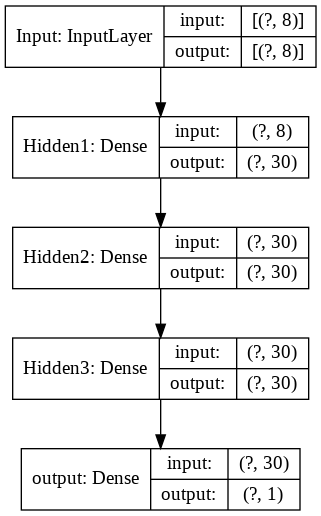

In [103]:
keras.utils.plot_model(model, show_shapes=True)

Next, let’s create a KerasRegressor based on this build_model() function:

In [0]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [0]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)]) 
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Let’s try to explore the number of hidden layers, the number of neurons and the learning rate:


In [118]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
  "n_hidden": [0, 1, 2, 3],
  "n_neurons": np.arange(1, 100), 
  "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=True) 
rnd_search_cv.fit(X_train, y_train, epochs=1,
                  validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Train on 7740 samples, validate on 3870 samples


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3870/3870 [==============================] - 0s 50us/sample - loss: 0.6322
Train on 7740 samples, validate on 3870 samples
3870/3870 [==============================] - 0s 46us/sample - loss: 0.5923
Train on 7740 samples, validate on 3870 samples
3870/3870 [==============================] - 0s 50us/sample - loss: 0.6044
Train on 7740 samples, validate on 3870 samples
3870/3870 [==============================] - 0s 46us/sample - loss: 1.1576
Train on 7740 samples, validate on 3870 samples
3870/3870 [==============================] - 0s 50us/sample - loss: 0.9483
Train on 7740 samples, validate on 3870 samples
3870/3870 [==============================] - 0s 51us/sample - loss: 1.5884
Train on 7740 samples, validate on 3870 samples
3870/3870 [==============================] - 0s 47us/sample - loss: 0.8531
Train on 7740 samples, validate on 3870 samples
3870/3870 [==============================] - 0s 47us/sample - loss: 0.8368
Train on 7740 samples, validate on 3870 samples
3870/3870 [=====

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.5min finished


RuntimeError: ignored

Using randomized search is not too hard, and it works well for many fairly simple problems. However, when training is slow (e.g., for more complex problems with larger datasets), this approach will only explore a tiny portion of the hyperparameter space. You can partially alleviate this problem by assisting the search process manually: first run a quick random search using wide ranges of hyperparameter values, then run another search using smaller ranges of values centered on the best ones found during the first run, and so on. This will hopefully zoom in to a good set of hyperparameters. However, this is very time consuming, and probably not the best use of your time.

* Hyperopt: a popular Python library for optimizing over all sorts of complex search spaces (including real values such as the learning rate, or discrete values such as the number of layers).
* Hyperas, kopt or Talos: optimizing hyperparameters for Keras model (the first two are based on Hyperopt).
* Scikit-Optimize (skopt): a general-purpose optimization library. The Bayes SearchCV class performs Bayesian optimization using an interface similar to Grid SearchCV.
* Spearmint: a Bayesian optimization library.
* Sklearn-Deap: a hyperparameter optimization library based on evolutionary
algorithms, also with a GridSearchCV-like interface.
* And many more!

## Numbers

### Number of Hidden Layers

Not only does this hierarchical architecture help DNNs converge faster to a good sol‐ ution, it also improves their ability to generalize to new datasets.
* Copy paste is easiear than draw all picture!
* A neural network to recognize hairstyle can use lower layers of another neural network which recognize faces.

### Number of Neurons per Hidden Layer

It depends on number of Input and Outputs.
Also hidden layers can have the same number of neurons.


A simpler approach is to pick a model with more layers and neurons than you actually need, then use early stopping to prevent it from overfitting

### Learning Rate, Batch Size and Other Hyperparameters

* The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate.  So a simple approach for tuning the learning rate is to start with a large value that makes the training algorithm diverge, then divide this value by 3 and try again, and repeat until the training algorithm stops diverging. At that point, you gener‐ ally won’t be too far from the optimal learning rate. That said, it is sometimes useful to reduce the learning rate during training: 
* Choosing a better optimizer than plain old Mini-batch Gradient Descent (and tuning its hyperparameters) is also quite important.
* The batch size can also have a significant impact on your model’s performance and the training time. In general the optimal batch size will be lower than 32